### Convolutional Neural Networks (CNNs): Step by step

Welcome to Course 4's first assignment! In this asssignment, you will implement convolutional (CONV) and pooling layers in numpy, including both forward and backward propagation. 

By the end of this notebook, you'll be able to:
1. Explain the convolution operation
2. Apply two different types of pooling operation
3. Identify the compoments used in a convolutional neural network (padding, stride, filter, .....) and their purpose
4. Build a convolutional neural network 

**Notation**:

- Superscript $[l]$ denotes an object of the $l^{th}$ layer. 
    - Example: $a^{[4]}$ is the $4^{th}$ layer activation. $W^{[5]}$ and $b^{[5]}$ are the $5^{th}$ layer parameters.


- Superscript $(i)$ denotes an object from the $i^{th}$ example. 
    - Example: $x^{(i)}$ is the $i^{th}$ training example input.
    
    
- Subscript $i$ denotes the $i^{th}$ entry of a vector.
    - Example: $a^{[l]}_i$ denotes the $i^{th}$ entry of the activations in layer $l$, assuming this is a fully connected (FC) layer.
    
    
- $n_H$, $n_W$ and $n_C$ denote respectively the height, width and number of channels of a given layer. If you want to reference a specific layer $l$, you can also write $n_H^{[l]}$, $n_W^{[l]}$, $n_C^{[l]}$. 
- $n_{H_{prev}}$, $n_{W_{prev}}$ and $n_{C_{prev}}$ denote respectively the height, width and number of channels of the previous layer. If referencing a specific layer $l$, this could also be denoted $n_H^{[l-1]}$, $n_W^{[l-1]}$, $n_C^{[l-1]}$. 

You should be familiar with `numpy` and/or have completed the previous courses of the specialization. Let's get started!


## 1-Packages

Let's first import all the packages that you will need during this assignment.
- numpy is the fundamental package for scientific computing with Python.
- matplotlib is a library to plot graphs in Python.
- np.random.seed(1) is used to keep all the random function calls consistent. 


In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from public_tests import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
np.random.seed(1)

In [2]:
%load_ext autoreload
%autoreload 2

### 2-Outline of the Assignmeent

You will be implementing the buiding blocks of a convolutional neural network! Each function you will implement will have detailed instructions to walk you through the steps:

- Convolutional functions, including: 
  - Zero padding
  - Convolve window
  - Convolution forward
  - Convolution backward(optional)
  
- Pooling functions, including:
  - Pooling forward
  - Create mask
  - Distribute value
  - Pooling backward(optional)

This notebook will ask you to implement these function from scratch in numpy. In the next notebook, you will use the TenforFlow equivalents of these functions to build the following model:

<img src="images/model.png" style="width:800px;height:300px;">

**Note**: For every forward function, there is a corresponding backward equivalent. Hence, at every step of your forward module you will store some parameters in a cache. These parameters are used to compute gradients during backpropagation. 

###  3 - Convolutional Neural Networks

Although programming frameworks make convolutions easy to use, they remain one of the hardest concepts to understand in Deep learning. A convolution layer transforms an input volume into an output volume of different size, as shown below. 

<img src="images/conv_nn.png" style="width:350px;height:200px;">

In this part, you will build every step of the convolution layer. You will first implement two helper functions: one for zero padding and the other for computing the convolution function itself. 



#### 3.1 - Zero-Padding

Zero-padding adds zeros around the border of an image. 

<img src="images/PAD.png" style="width:600px;height:400px;">
<caption><center> <u> <font color='purple'> <b>Figure 1</b> </u></font><font color='purple'>  : <b>Zero-Padding</b><br> Image (3 channels, RGB) with a padding of 2. </font> </center></caption>


the main benefits of padding are:

- It allows you to use a CONV layer without necessarily shrinking the height and width of the volumes. This is important for building deeper networks, since otherwise the height/width would shrink as you go to deeper layers. An important special case is the "same" convolution, in which the height/width is exactly preserved after one layer.
- It helps us keep more of the information at the border of an image. without padding, very few values at the next layer would be affected by pixels at the edges of an image.  


**Exercise 1 - zero_pad**

Implement the following function, which pads all the images of a batch of examples X with zeros. Note if you want to pad the array "a" of shape (5,5,5,5,5) with pad = 2 for the 2nd dimension, pad = 3 for the 4th dimension and pad=0 for the rest, you would do:             

```python 
a = np.pad(a, ((0,0),(2,2),(0,0),(3,3),(0,0)), 'constant', constant_values = (0,0))
```
np.pad function documentstion: https://numpy.org/doc/stable/reference/generated/numpy.pad.html

- numpy.pad(array, pad_width, mode='constant', **kwargs)
  - array: array_like, Input array to pad.
  - `pad_width`: specifies the number of values padded to the edges of each axis.
    - A single integer, Number of values padded to the edges of each axis.
    - A tuple of two integers, apply this tuple to each axes.
    - A tuple of tuples, specifiying the pad widths for each axis.
  - mode: str, The method used to pad the array.
    - 'constant': Pads with a constant value.
    - 'edge' or 'nesrest': Pads with the edge values of array.
    - 'linear_ramp': Pads with the linear ramp between end_value and the array edge value.
  -kwargs: Additional keyword arguments to pass to the padding function.
    - constant_values: Used in 'constant' mode, the values to set the padded values for each axis. 
      - A single int: sets all padded values to the same value.
      - A tuple of two ints: (before, after) values for each axis.
      - A tuple of tuples: specifiying the before and after values for each axis.




In [31]:
## GRADE FUNCTION: zero_pad

def zero_pad(X, pad):
    """
    Pad with zeros all images of the dataset X. The padding is applied to the height and width of an image.
    
    Argument:
    X -- python numpy array of shape (m, n_H, n_W, n_C) representing a batch of m images
    pad -- integer, amount of padding around each image on vertical and horizontal dimensions
    
    Returns:
    X_pad -- padded image of shape (m, n_H + 2*pad, n_W + 2*pad, n_C)
    """
    
    ### START CODE HERE ### (≈ 1 line)
    X_pad = np.pad(X, ((0,0), (pad,pad), (pad,pad), (0,0)), 'constant', constant_values = (0,0))
    ### END CODE HERE ###
    
    return X_pad

x_pad.shape =
 (4, 9, 9, 2)
x[1,1] =
 [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1,1] =
 [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
x.shape =
 (4, 3, 3, 2)
x_pad.shape =
 (4, 9, 9, 2)
x[1,1] =
 [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1,1] =
 [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]
All tests passed!


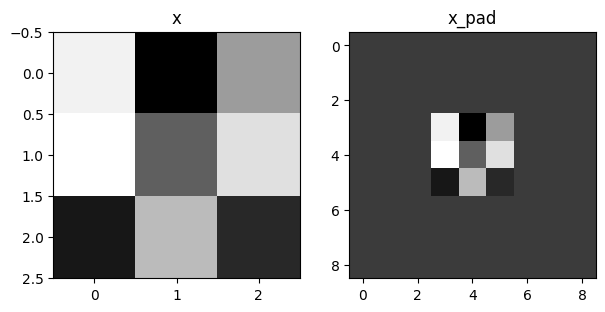

In [32]:
np.random.seed(1)
x = np.random.randn(4, 3, 3, 2)


x_pad = zero_pad(x, 3)
# print ("x.shape =\n", x.shape)
print ("x_pad.shape =\n", x_pad.shape)
print ("x[1,1] =\n", x[1, 1])
print ("x_pad[1,1] =\n", x_pad[1, 1])

fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x[0, :, :, 0])
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0, :, :, 0])
zero_pad_test(zero_pad)

### 3.2 - Single Step of Convolution
In this part, implement a single step of convolution, in which you apply the filter to a single position of the input. This will be used to build a convolutional unit, which: 
- Take an input volume
- Applies a filter at every position of the input
- Outputs another volume (usually a different size)

In a compute vision application, each value in the matrix on the left corresponds to a single pixel value. you convolve a 3*3 filter with the image by multiplying its values element-wise with the original matrix, then summing them up and adding a filter to just one of the positions to get a single real-valued output.

**Exercise 2 - conv_single_step**

**Note**: The variable b will be passed in as a numpy array. if you add a scalar to a numpy array, the result is a numpy array. in the special case of a numpy arrary containing a single value, you can cast it as a float to convert it to a scalar. 


In [ ]:
## GRADE FUNCTION: conv_single_step

def conv_single_step(a_slice_prev, W, b):
    """
    Apply one filter defined by parameters W on a single slice (a_slice_prev) of the output activation 
    of the previous layer.
    
    Arguments:
    a_slice_prev -- slice of input data of shape (f, f, n_C_prev)
    W -- Weight parameters contained in a window - matrix of shape (f, f, n_C_prev)
    b -- Bias parameters contained in a window - matrix of shape (1, 1, 1)
    
    Returns:
    Z -- a scalar value, result of convolving the sliding window (W, b) on a slice x of the input data
    """
    
    ### START CODE HERE ### (≈ 2 lines of code)
    s = a_slice_prev * W
    Z = np.sum(s)
    Z = Z + float(b)
    ### END CODE HERE ###
    
    return Z